In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

In [3]:
grayImage = r'C:\Users\DeLL\Desktop\ML\CV\images\albert-einstein_gray.jpg'
colourImage = r'C:\Users\DeLL\Desktop\ML\CV\images\tulips.jpg'
affineWarped = r'C:\Users\DeLL\Desktop\ML\CV\images\albert-einstein_Affine_warped.jpg'
projectiveWarped = r'C:\Users\DeLL\Desktop\ML\CV\images\albert-einstein_Projective_warped.jpg'

In [4]:
I_gray = cv2.imread(grayImage,cv2.IMREAD_GRAYSCALE)
I_BGR = cv2.imread(colourImage)
I_affineWarped = cv2.imread(affineWarped,cv2.IMREAD_GRAYSCALE)
I_projectiveWarped = cv2.imread(projectiveWarped,cv2.IMREAD_GRAYSCALE)


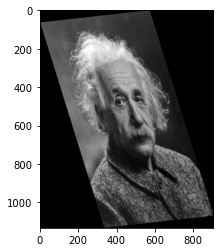

In [5]:
plt.imshow(I_affineWarped,cmap='gray')

In [6]:
def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape
    figSize = W/float(dpi) , H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I,cmap='gray')
    plt.show

In [7]:
def f_bilinearInterpolate(r,c,I):
    lc = int(c)
    rc = lc+1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr+1
    wt = br-r
    wb = r-tr
    if tr >= 0 and br < I.shape[0] and lc >=0 and rc < I.shape[1]:
        a = wl*I[tr,lc] + wr*I[tr,rc]
        b = wl*I[br,lc] + wr*I[br,rc]
        g = wt*a + wb*b
        return np.uint8(g)
    else:
        return 0

In [8]:
def f_getExtentsProjective(T,rMax,cMax):
    Cords = np.array([[0,0,1],[0,cMax-1,1],[rMax-1,0,1],[rMax-1,cMax-1,1]])
    A_dash = T.dot(Cords.T)
    A_dash = A_dash/A_dash[2,:]
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1, maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [9]:
def f_transformProjective(T,I_gray):
    rMax,cMax = I_gray.shape[0],I_gray.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtentsProjective(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    Tinv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j,1])
            P = Tinv.dot(P_dash)
            P = P/P[2]
            i , j = P[0] , P[1]
            if i < 0 or i>=rMax or j<0 or j>=cMax:
                pass
            else:
                g = f_bilinearInterpolate(i,j,I_gray)
                I2[new_i-minR,new_j-minC] = g
    return I2

In [10]:
def f_getPoints(I,numPts):
    %matplotlib
    fig,ax = plt.subplots(1,figsize=(15,30))
    plt.imshow(I,cmap='gray')
    pts = np.round(np.array(plt.ginput(n=numPts)))
    pts = pts[:,[1,0]].T
    plt.close()
    return pts

In [10]:
pts = f_getPoints(I_gray,4)

Using matplotlib backend: Qt5Agg


In [11]:
pts

array([[397., 387., 477., 631.],
       [317., 389., 440., 412.]])

In [11]:
P = f_getPoints(I_gray,3)

Using matplotlib backend: Qt5Agg


In [12]:
P

array([[402., 400., 479.],
       [320., 499., 443.]])

In [13]:
P_dash = f_getPoints(I_affineWarped,3)

Using matplotlib backend: Qt5Agg


In [14]:
P_dash

array([[487., 471., 569.],
       [389., 530., 515.]])

In [15]:
P = np.vstack((P,np.ones((1,3))))

In [16]:
P

array([[402., 400., 479.],
       [320., 499., 443.],
       [  1.,   1.,   1.]])

In [17]:
P_dash = np.vstack((P_dash,np.ones((1,3))))

In [18]:
np.linalg.det(P)

-14028.99999999999

In [19]:
A = P_dash.dot(np.linalg.inv(P))

In [20]:
A

array([[ 1.18654216e+00, -7.61280205e-02,  3.43710172e+01],
       [ 3.71444864e-01,  7.91859719e-01, -1.37159455e+01],
       [-1.73472348e-18, -1.35525272e-19,  1.00000000e+00]])

In [21]:
I2=f_transformProjective(A,I_gray)

In [22]:
plt.imshow(I2,cmap='gray')

In [32]:
plt.imshow(I_affineWarped,cmap='gray')

In [34]:
P = f_getPoints(I_gray,5)

Using matplotlib backend: Qt5Agg


In [35]:
P_dash = f_getPoints(I_affineWarped,5)

Using matplotlib backend: Qt5Agg


In [36]:
P = np.vstack((P,np.ones((1,5))))

In [37]:
P_dash = np.vstack((P_dash,np.ones((1,5))))

In [38]:
A = P_dash.dot(P.T).dot(np.linalg.inv(P.dot(P.T)))

In [39]:
A

array([[ 1.12102863e+00, -9.88358648e-02,  7.16892816e+01],
       [ 3.67382286e-01,  7.85155807e-01, -8.37786872e+00],
       [ 1.38777878e-17,  0.00000000e+00,  1.00000000e+00]])

In [40]:
I2=f_transformProjective(A,I_gray)

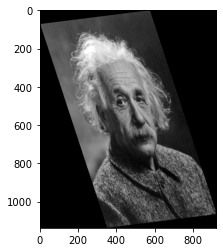

In [42]:
%matplotlib inline
plt.imshow(I2,cmap='gray')

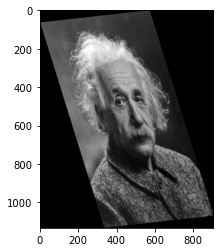

In [43]:
plt.imshow(I_affineWarped,cmap='gray')

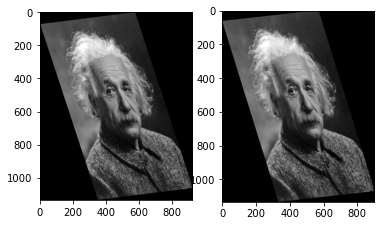

In [47]:
plt.figure(1)
plt.subplot(121)
plt.imshow(I2,cmap='gray')
plt.subplot(122)
plt.imshow(I_affineWarped,cmap='gray')
plt.show()

In [48]:
P = f_getPoints(I_gray,3)

Using matplotlib backend: Qt5Agg


In [49]:
P_dash = f_getPoints(I_projectiveWarped,3)

Using matplotlib backend: Qt5Agg


In [50]:
P = np.vstack((P,np.ones((1,3))))
P_dash = np.vstack((P_dash,np.ones((1,3))))

In [51]:
H = P_dash.dot(np.linalg.inv(P))

In [53]:
I2=f_transformProjective(H,I_gray)

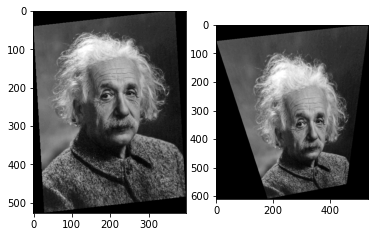

In [55]:
%matplotlib inline
plt.subplot(121)
plt.imshow(I2,cmap='gray')
plt.subplot(122)
plt.imshow(I_projectiveWarped,cmap='gray')
plt.show()

In [56]:
H

array([[ 5.10548523e-01, -5.72916667e-02,  1.67655591e+02],
       [ 2.95358650e-02,  5.05208333e-01,  1.06560654e+02],
       [ 0.00000000e+00,  3.18398613e-19,  1.00000000e+00]])

In [11]:
def f_computeRightNullSpace(A):
    B = A.T.dot(A)
    w,v = np.linalg.eig(B)
    idx = np.argmin(w)
    nullVector = v[:,idx]
    return nullVector
    

In [61]:
A = np.random.rand(3,4)

In [62]:
nv = f_computeRightNullSpace(A)

In [63]:
nv

array([-0.53863092, -0.43963453, -0.21663678,  0.68532235])

In [64]:
A.dot(nv)

array([-2.77555756e-16, -4.44089210e-16,  2.22044605e-16])

In [96]:
P = f_getPoints(I_gray,6)

Using matplotlib backend: Qt5Agg


In [97]:
P_dash = f_getPoints(I_projectiveWarped,6)

Using matplotlib backend: Qt5Agg


In [98]:
P = np.vstack((P,np.ones((1,6))))
P_dash = np.vstack((P_dash,np.ones((1,6))))

In [102]:
A = np.zeros((12,9))

In [103]:
A[::2,:3] = -P.T
A[1::2,3:6] = -P.T
A[::2,6:] = P.dot(np.diag(P_dash[0,:])).T
A[1::2,6:] = P.dot(np.diag(P_dash[1,:])).T

In [104]:
h = f_computeRightNullSpace(A)

In [105]:
h

array([-1.97901542e-02,  1.37649164e-03, -9.99179119e-01, -6.16459363e-03,
       -1.30288496e-02, -2.76532923e-02, -1.68706806e-05, -1.69695940e-06,
       -1.65857181e-02])

In [106]:
H = np.reshape(h,(3,3))

In [107]:
H

array([[-1.97901542e-02,  1.37649164e-03, -9.99179119e-01],
       [-6.16459363e-03, -1.30288496e-02, -2.76532923e-02],
       [-1.68706806e-05, -1.69695940e-06, -1.65857181e-02]])

In [108]:
I2=f_transformProjective(H,I_gray)

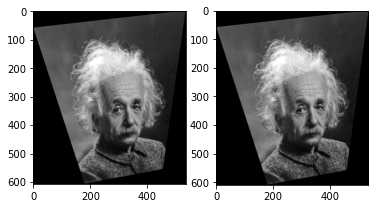

In [109]:
%matplotlib inline
plt.subplot(121)
plt.imshow(I2,cmap='gray')
plt.subplot(122)
plt.imshow(I_projectiveWarped,cmap='gray')
plt.show()

In [2]:
im1 = cv2.imread(r'C:\Users\DeLL\Desktop\ML\CV\images\1.jpg')
im2 = cv2.imread(r'C:\Users\DeLL\Desktop\ML\CV\images\2.jpg')
im3 = cv2.imread(r'C:\Users\DeLL\Desktop\ML\CV\images\3.jpg')

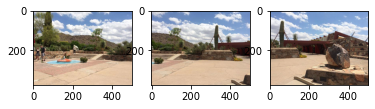

In [3]:
plt.subplot(131)
plt.imshow(im1[:,:,::-1])
plt.subplot(132)
plt.imshow(im2[:,:,::-1])
plt.subplot(133)
plt.imshow(im3[:,:,::-1])
plt.show()

In [4]:
imgs = []
imgs.append(im1)
imgs.append(im2)
imgs.append(im3)

In [5]:
M = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)
status,pano = M.stitch(imgs)

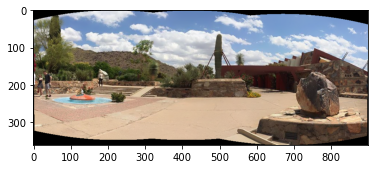

In [6]:
plt.imshow(pano[:,:,::-1])